# 1.10

### Setup

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def get_delta_t(delta_x, buffer):
    return 0.5 * np.square(delta_x) * buffer

### Initialization

In [26]:
space_steps = 101
    
delta_x = 1/(space_steps - 1)
delta_t = 0.001

time_step_space = 0.3

time_steps = int(np.ceil(time_step_space / delta_t))

current_temperature = np.zeros(space_steps)
next_temperature = np.zeros(space_steps)
plot_data = []

current_temperature[0] = 350
current_temperature[-1] = 250

next_temperature[0] = 350
next_temperature[-1] = 250

alpha = delta_t / delta_x**2

### Heat simulation

In [43]:
for i in range(space_steps - 2):
    j = (i + 1) * delta_x
    current_temperature[i + 1] = 350 - 100 * j + 200 * np.sin(np.pi * j)
    
a = (1 + 2 * alpha) * np.ones(space_steps)
b = -alpha * np.ones(space_steps - 1)

c = np.zeros(space_steps)
c[0] = a[0]

# A = np.diag(b[1:], -1) + np.diag(a) + np.diag(b[:-1], 1)

for i in range(1, space_steps):
    c[i] = a[i] - (np.square(b[i - 1]) / c[i - 1])

# Time-stepping
plot_data = [current_temperature.copy()]
for t in range(time_steps):
    F = np.zeros(space_steps)
    F[0] = 350
    F[-1] = 250
    F = F * alpha + current_temperature
    
    for i in range(1, space_steps):
        F[i] = F[i] - (b[i - 1] / c[i - 1]) * F[i - 1] #g and f vector at some point
    
    current_temperature[-1] = F[-1] / c[-1]
    
    for i in range(space_steps - 2, 0, -1):
        current_temperature[i] = (F[i] - (b[i] * current_temperature[i + 1])) / c[i]
        
    current_temperature[0] = 350
    current_temperature[-1] = 250
    
    plot_data.append(current_temperature.copy())

### 3D Plot

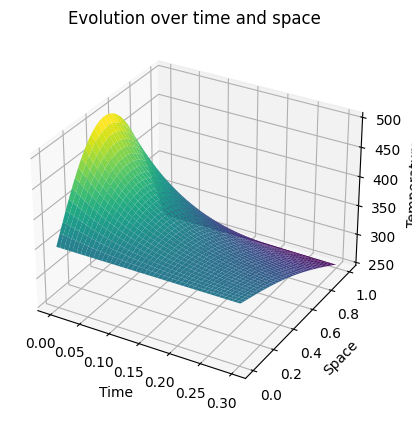

In [44]:
#plotting
data_np = np.array(plot_data)
data_np = data_np.T 

space = np.linspace(0, 1, space_steps)
time = np.linspace(0, time_step_space, time_steps + 1)

Time, Space = np.meshgrid(time, space)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Time, Space, data_np, cmap='viridis') 

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('Temperature')
ax.set_title('Evolution over time and space')
plt.show()

### 2D Plot

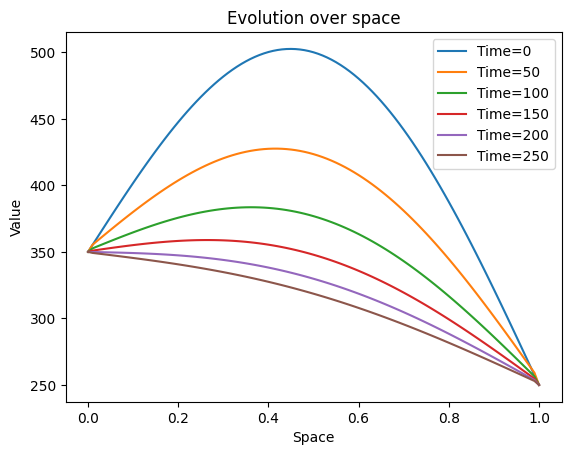

In [46]:
#plotting
data_np = np.array(plot_data)
data_np = data_np.T 

space = np.linspace(0, 1, space_steps)
time = np.linspace(0, 1, time_steps)

# Plotting for discrete timestamp values
for t in range(0, time_steps, 50):  # Change the step size as per your requirement
    plt.plot(space, data_np[:, t], label=f'Time={t}')

plt.xlabel('Space')
plt.ylabel('Value')
plt.title('Evolution over space')
plt.legend()
plt.show()